<a href="https://colab.research.google.com/github/Ahnjihye/allinone_AI/blob/master/AIOAI_%EC%8B%AC%ED%99%94_day4_(%EC%99%84%EC%84%B1%EB%B3%B8)_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%B0%EC%A7%91%ED%99%94_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-means

군집의 개수는 정하기 나름 

<img src='https://github.com/Ahnjihye/allinone_AI/blob/images/65_clustering.png?raw=true' width=600>

### Kmeans 군집 결정 알고리즘

<img src='https://ichi.pro/assets/images/max/724/1*b2sO2f--yfZiJazc5rYSpg.gif' width=500>

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIzYb3%2FbtqyWWJ6pRR%2FfLbSvEKc7ncHp18dMLtcIK%2Fimg.png' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdl53k5%2FbtqySsYwtNv%2F6Yd5kpKS4KN7FO6h95AJn0%2Fimg.png' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKZwKX%2FbtqyUK49PIv%2Fpz8uFW6TxKPYLkTTAc4IkK%2Fimg.png' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOdu7N%2FbtqyTk0hrsL%2FOTet3D6KqHb6W00N8xX3J0%2Fimg.png' width=600>


#### 코딩하기 전에 K-means를 시뮬레이션해보자


[K-means Clustering Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)


In [1]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


## 여러 개의 과일 구분하기

(1) 데이터 업로드 및 숫자 변환

In [4]:
from google.colab import files
uploaded = files.upload()



Saving fruit_data_clustering.csv to fruit_data_clustering (1).csv


In [5]:
import csv 
 
f = open('fruit_data_clustering (1).csv')
data = csv.reader(f)
next(data)
data = list(data)

In [6]:
data[:3]

[['192', '8.4', '7.3', '0.55'],
 ['180', '8', '6.8', '0.59'],
 ['176', '7.4', '7.2', '0.6']]

In [7]:
for row in data : 
    row[0] = int(row[0])
    row[1] = float(row[1])
    row[2] = float(row[2])
    row[3] = float(row[3])


In [8]:
data[:3]

[[192, 8.4, 7.3, 0.55], [180, 8.0, 6.8, 0.59], [176, 7.4, 7.2, 0.6]]

In [9]:
len(data)

59

(2) 데이터 시각화 



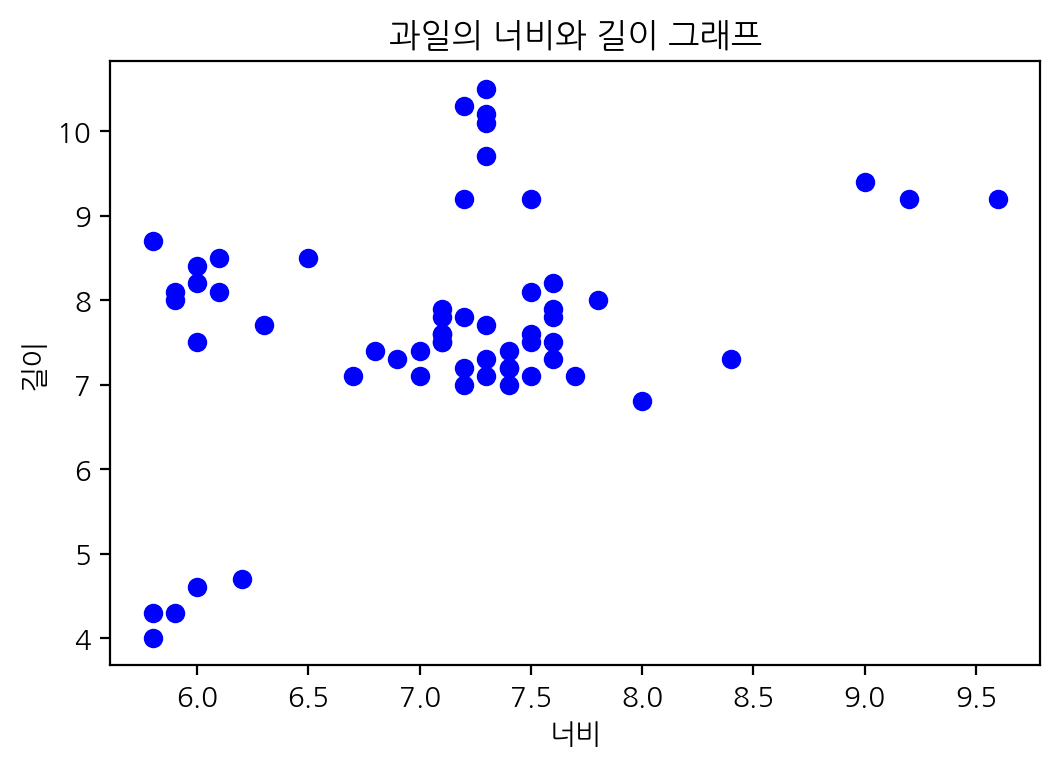

In [10]:
# 가로축이 width(너비), 세로축이 height(길이)인 산점도 + 색상구분 
plt.figure(dpi = 100)
plt.title('과일의 너비와 길이 그래프')

for row in data : 
    plt.scatter(row[1], row[2], color='b')

plt.xlabel('너비')
plt.ylabel('길이')
plt.show()

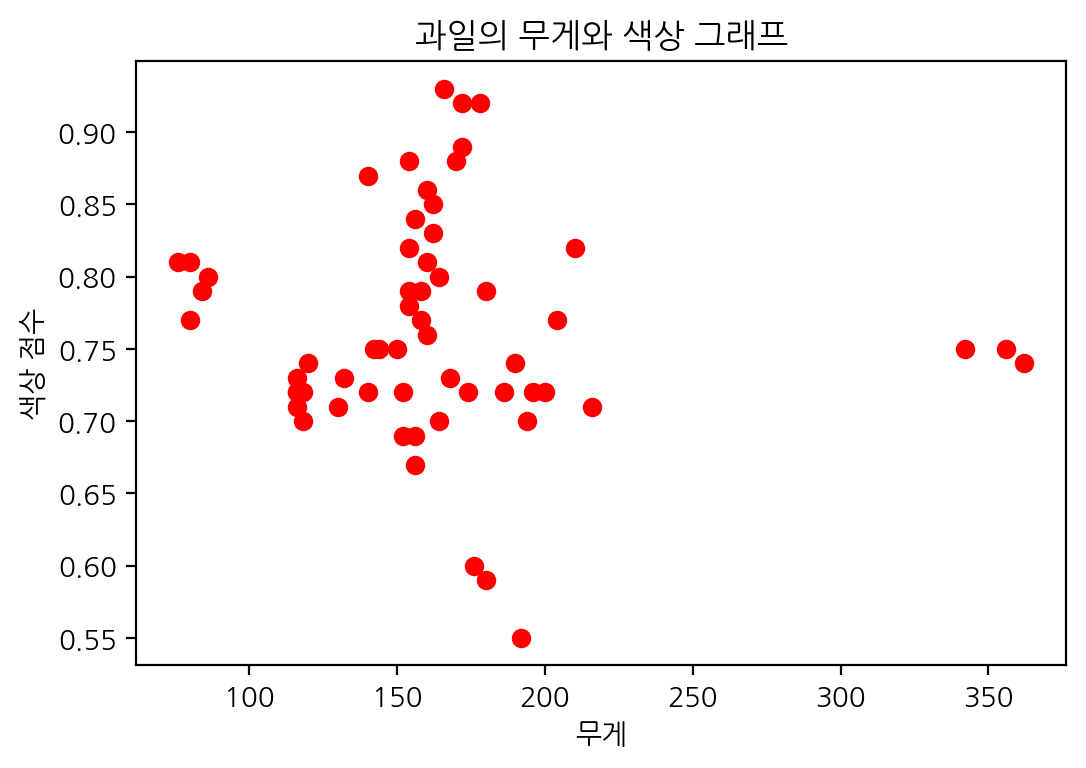

In [11]:
# 가로축이 mass(무게), 세로축이 color_score(색상)인 산점도 + 색상구분 
plt.figure(dpi = 100)
plt.title('과일의 무게와 색상 그래프')

for row in data : 
    plt.scatter(row[0], row[-1], color='r')

plt.xlabel('무게')
plt.ylabel('색상 점수')
plt.show()

In [12]:
from sklearn.cluster import KMeans   # k-means 기능 포함시키기 

# K-means 모델 생성
model = KMeans(n_clusters = 3)       # 나눌 그룹 개수(k) = 3


In [13]:
labels = model.fit_predict(data)

# K-means 군집화 결과가 저장된 변수 labels 확인
print(labels)

[0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2]


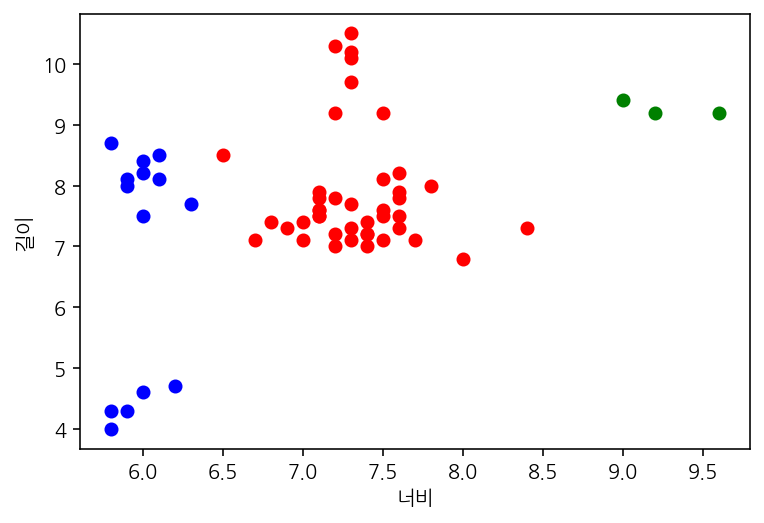

In [14]:
# data[i]의 결과는 label[i]에 저장되어 있음
# label[i]의 값(0, 1, 2)에 따라 색상을 달리하여 
# 과일의 너비와 길이로 구성된 산점도 그리기

for i in range(len(data)) : 
    if labels[i] == 0 : 
        plt.scatter(data[i][1], data[i][2], color ='r')
    elif labels[i] == 1 : 
        plt.scatter(data[i][1], data[i][2], color ='g')
    elif labels[i] == 2 :
        plt.scatter(data[i][1], data[i][2], color ='b')

plt.xlabel('너비')
plt.ylabel('길이')
plt.show()

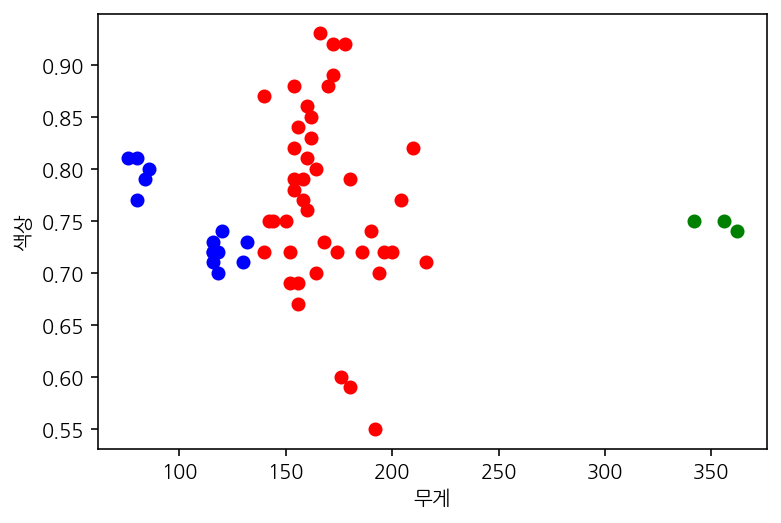

In [15]:
# data[i]의 결과는 label[i]에 저장되어 있음
# label[i]의 값(0, 1, 2)에 따라 색상을 달리하여 
# 과일의 무게와 색상으로 구성된 산점도 그리기

for i in range(len(data)) : 
    if labels[i] == 0 : 
        plt.scatter(data[i][0], data[i][-1], color ='r')
    elif labels[i] == 1 : 
        plt.scatter(data[i][0], data[i][-1], color ='g')
    elif labels[i] == 2 :
        plt.scatter(data[i][0], data[i][-1], color ='b')

plt.xlabel('무게')
plt.ylabel('색상')
plt.show()

In [17]:
from sklearn.cluster import KMeans   # k-means 기능 포함시키기 

# K-means 모델 생성
model = KMeans(n_clusters = 5)       # 나눌 그룹 개수(k) = 5

labels = model.fit_predict(data)

# K-means 군집화 결과가 저장된 변수 labels 확인
print(labels)

[0 0 1 4 4 4 4 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 2 2 0 3 1 1 0 1 0 3 1 1
 1 1 1 1 0 1 0 0 0 0 0 1 3 3 3 3 3 3 3 3 1 3]


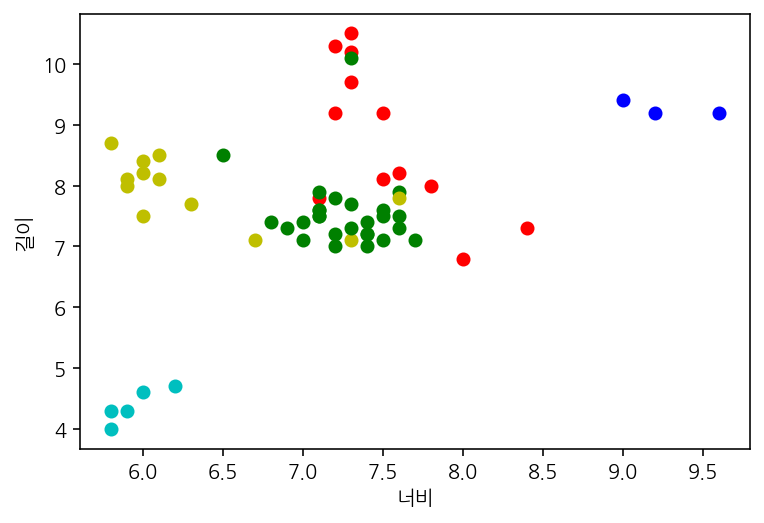

In [18]:
# data[i]의 결과는 label[i]에 저장되어 있음
# label[i]의 값(0~4)에 따라 색상을 달리하여 
# 과일의 너비와 길이로 구성된 산점도 그리기

for i in range(len(data)) : 
    if labels[i] == 0 : 
        plt.scatter(data[i][1], data[i][2], color ='r')
    elif labels[i] == 1 : 
        plt.scatter(data[i][1], data[i][2], color ='g')
    elif labels[i] == 2 :
        plt.scatter(data[i][1], data[i][2], color ='b')
    elif labels[i] == 3 :
        plt.scatter(data[i][1], data[i][2], color ='y')
    elif labels[i] == 4 :
        plt.scatter(data[i][1], data[i][2], color ='c')

plt.xlabel('너비')
plt.ylabel('길이')
plt.show()

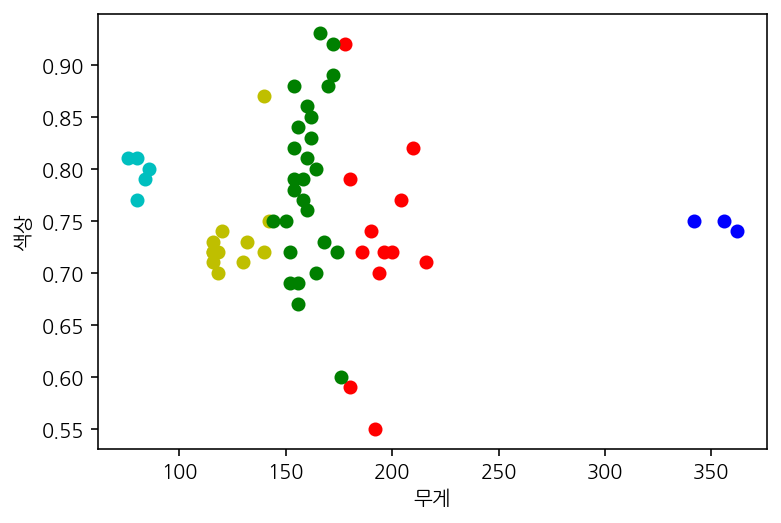

In [19]:
# data[i]의 결과는 label[i]에 저장되어 있음
# label[i]의 값(0, 1, 2)에 따라 색상을 달리하여 
# 과일의 무게와 색상으로 구성된 산점도 그리기

for i in range(len(data)) : 
    if labels[i] == 0 : 
        plt.scatter(data[i][0], data[i][-1], color ='r')
    elif labels[i] == 1 : 
        plt.scatter(data[i][0], data[i][-1], color ='g')
    elif labels[i] == 2 :
        plt.scatter(data[i][0], data[i][-1], color ='b')
    elif labels[i] == 3 :
        plt.scatter(data[i][0], data[i][-1], color ='y')
    elif labels[i] == 4 :
        plt.scatter(data[i][0], data[i][-1], color ='c')


plt.xlabel('무게')
plt.ylabel('색상')
plt.show()

#### 지난 연수때 배웠던 K-means 코드를 복습해보자

[K-means 라이브러리 없이 직접 작성해보는 코드 복습해보기](https://github.com/Ahnjihye/allinone_AI/blob/master/AIO_AI_day4_(%EC%99%84%EC%84%B1%EB%B3%B8)_k_means_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EB%AA%A8%EB%8D%B8.ipynb)


# 선형 회귀

가장 훌륭한 예측선을 찾아가는 과정

<img src='https://i.stack.imgur.com/onf2z.gif' width=400>

#### 평균 제곱 오차 (MSE) - 가장 정확한 예측선은 오차가 가장 적을 것이다!

<img src='https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683' width=500>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shoes and height.csv to shoes and height.csv


In [ ]:
import csv

f = open('shoes and height.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

data[0]

['1', '245', '161']

In [ ]:
for row in data : 
    row[0] = int(row[0])
    row[1] = int(row[1])
    row[2] = int(row[2])

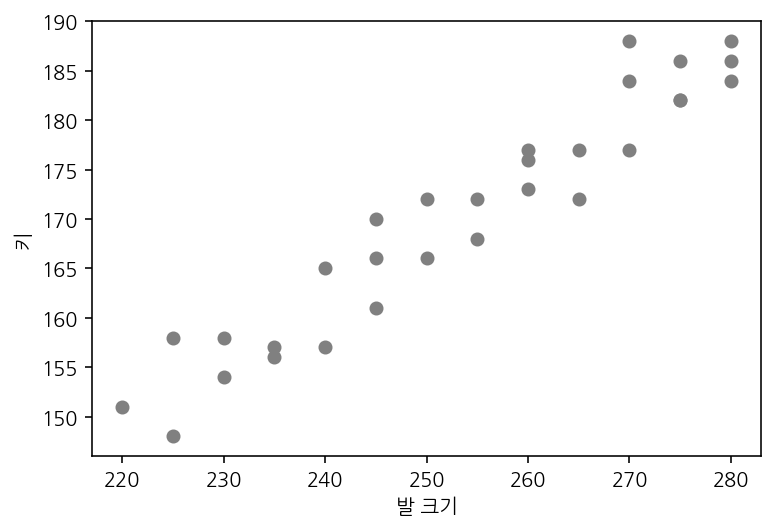

In [ ]:
import matplotlib.pyplot as plt

for row in data : 
    plt.scatter(row[1], row[-1], color='gray')

plt.xlabel('발 크기')
plt.ylabel('키')
plt.show()

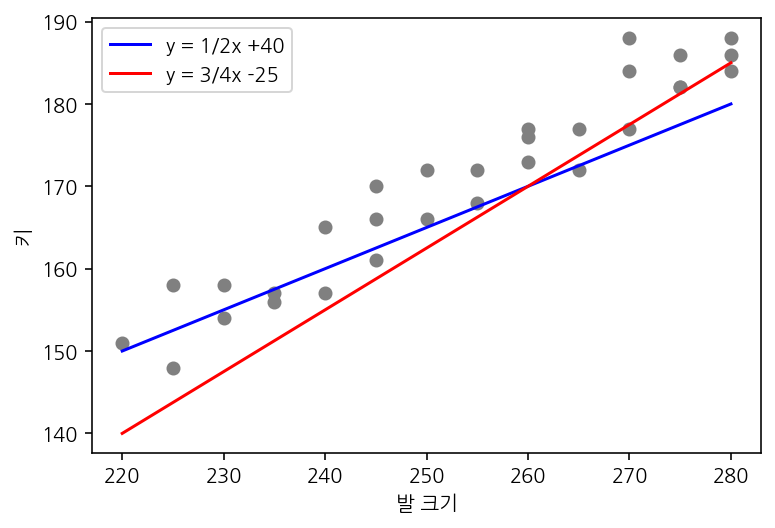

In [ ]:
for row in data : 
    plt.scatter(row[1], row[-1], color='gray')

plt.plot([220,280],[1/2*220+40, 1/2*280+40], 
         color = 'b', label= 'y = 1/2x +40')
plt.plot([220,280],[3/4*220-25, 3/4*280-25], 
         color = 'r', label= 'y = 3/4x -25')

plt.legend()
plt.xlabel('발 크기')
plt.ylabel('키')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# y = 1/2x +40 의 평균제곱오차
x = []          # 발크기
y_true =[]      # 실제 키
y_pred1 = []     # y = 1/2x+40로 예측한 키

for row in data : 
    x.append([row[1]])
    y_true.append(row[-1])
    y_pred1.append(row[1]/2+40)


In [ ]:
mean_squared_error(y_true, y_pred1)

27.883333333333333

In [ ]:
# y = 3/4x -25 의 평균제곱오차
y_pred2 = []     # y = 3/4x -25로 예측한 키

for row in data : 
    y_pred2.append(row[1]*3/4 - 25)

In [ ]:
mean_squared_error(y_true, y_pred2)

42.40416666666667

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([0.61997292])

In [ ]:
model.intercept_

13.100203114421106

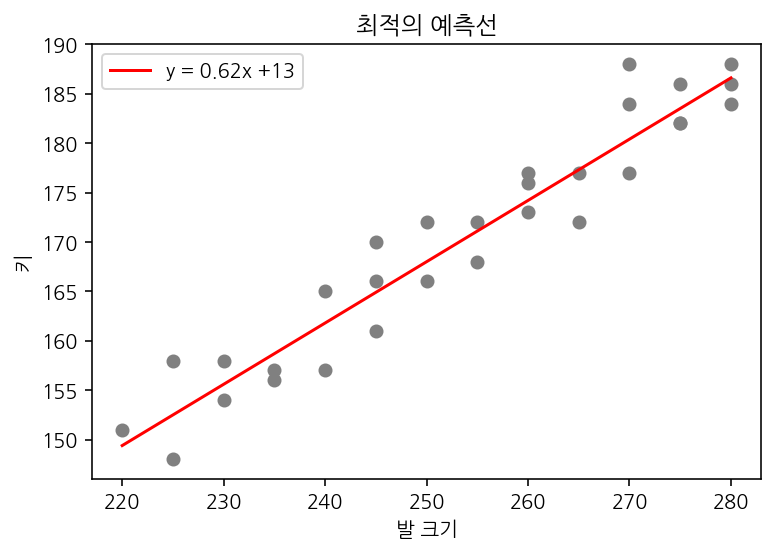

In [ ]:
plt.title('최적의 예측선')

for row in data : 
    plt.scatter(row[1], row[-1], color='gray')

plt.plot([220,280],[0.62*220+13, 0.62*280+13], 
         color = 'r', label= 'y = 0.62x +13')

plt.legend()
plt.xlabel('발 크기')
plt.ylabel('키')
plt.show()

#### 지난 연수때 배웠던 선형회귀 코드를 복습해보자

[선형회귀 라이브러리 없이 직접 작성해보는 코드 복습해보기](https://github.com/Ahnjihye/allinone_AI/blob/master/AIO_AI_day5_(%EC%99%84%EC%84%B1%EB%B3%B8)_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb)
